# Titanic Disaster Survival

In [1]:
#importing libraries

#for manupulation
import numpy as np
import pandas as pd

#for visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

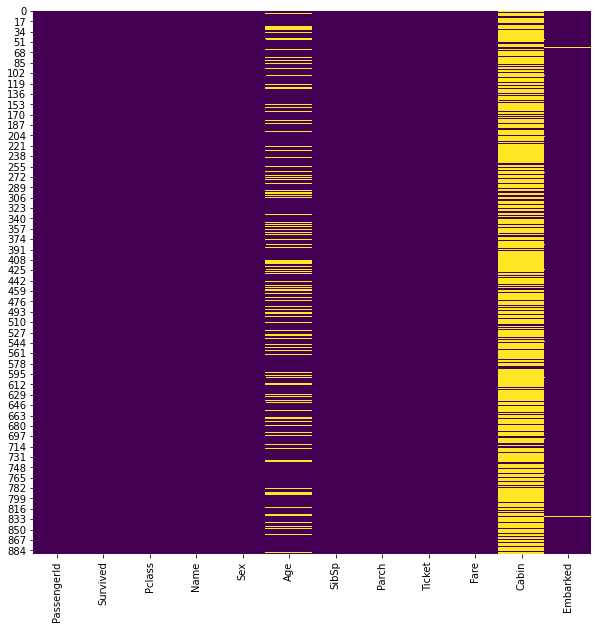

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

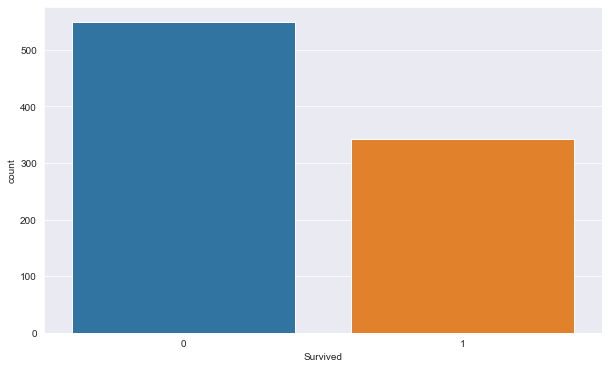

In [8]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

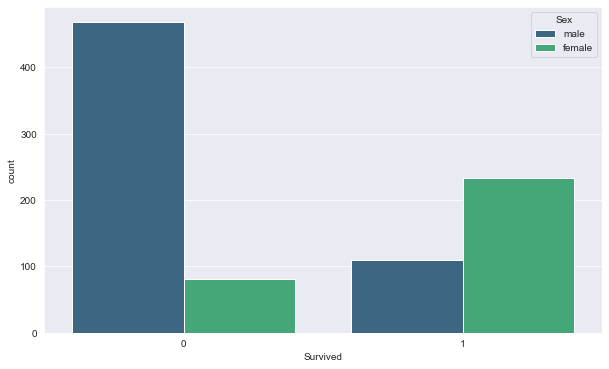

In [9]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df,hue='Sex',palette='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

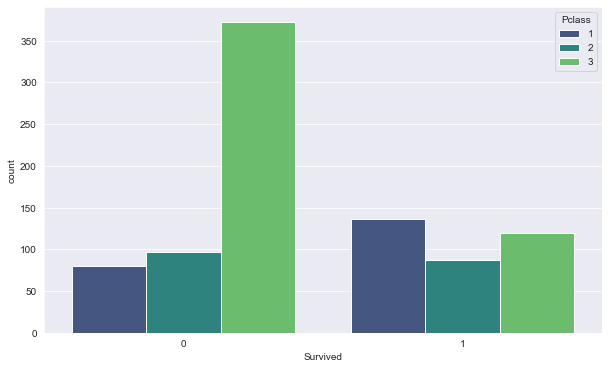

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df,hue='Pclass',palette='viridis')

C:\Users\omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

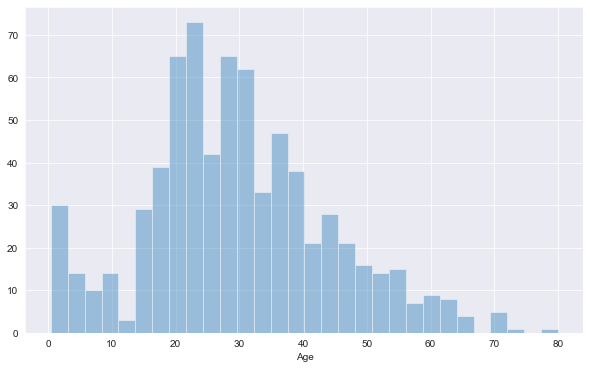

In [11]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

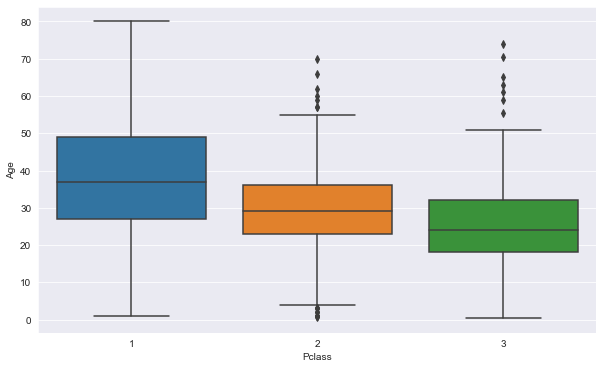

In [12]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
def for_filling_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(for_filling_age,axis = 1)

<AxesSubplot:>

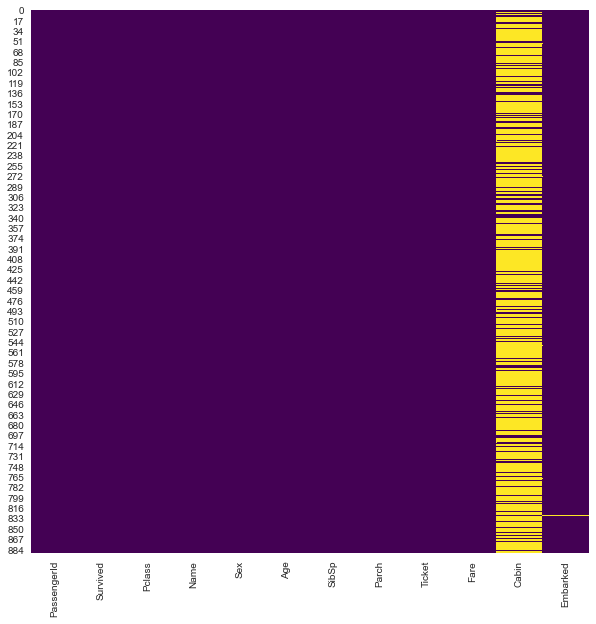

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [17]:
#As there are lots of null values in Cabin we should drop the cabin column
df = df.drop('Cabin',axis=1)

In [18]:
#As there are very less null values in embarked so we should drop the null values
df = df.dropna()

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
Sex = pd.get_dummies(df['Sex'],drop_first = True)

In [21]:
Embarked = pd.get_dummies(df['Embarked'],drop_first = True)

In [22]:
df = df.drop(['Sex','Embarked','Name','Ticket'],axis=1)

In [23]:
df = pd.concat([df,Sex,Embarked],axis=1)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
#Training the Model

from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Survived',axis=1)

In [27]:
y = df['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lm = LogisticRegression()

In [31]:
lm.fit(X_train,y_train)

C:\Users\omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predictions = lm.predict(X_test)

In [33]:
#Checking the performance of the Model

from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.81      0.63      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [35]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 38  66]]


In [42]:
#Testing the Model

import random

random_person = random.randint(0,len(df))

survived_person = df.drop('Survived',axis=1).iloc[random_person]

survived_person

PassengerId    314.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare             7.8958
male             1.0000
Q                0.0000
S                1.0000
Name: 313, dtype: float64

In [43]:
lm.predict(survived_person.values.reshape(1,-1))

array([0], dtype=int64)

In [44]:
df.iloc[random_person]['Survived']

0.0